In [82]:
pwd

'/home/wsuser/work'

# Load the dataset

In [83]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_378b6e882725431aad2200974e250979 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9kmxRzK_aXT1r2zFAF9Z4b2NH9kq0lX45XxATBpvSwmY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_3 = client_378b6e882725431aad2200974e250979.get_object(Bucket='aiprojectbuildathon-donotdelete-pr-bxzxrqmbktanzl', Key='Fertilizers_Recommendation_System_For_Disease_Prediction.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# UNZIP

In [84]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [85]:
ls

'Dataset Plant Disease'/                                      fruit.h5
'Fertilizers Recommendation System For Disease Prediction'/


In [87]:
pwd

'/home/wsuser/work'

In [88]:
# Image Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [90]:
ls

'Dataset Plant Disease'/                                      fruit.h5
'Fertilizers Recommendation System For Disease Prediction'/


In [91]:
pwd

'/home/wsuser/work'

In [114]:
x_train = train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size = (64,64),batch_size=24,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size = (64,64),batch_size=24,class_mode = 'categorical')

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [115]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [116]:
x_test.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [117]:
# CNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [118]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [119]:
# Hidden Layers

model.add(Dense(64 ,activation='relu'))
model.add(Dense(64,activation = 'relu'))


In [120]:
# Output Layer

model.add(Dense(6,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 30752)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1968192   
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 6)                 390       
                                                      

In [121]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/tmp/wsuser/ipykernel_164/1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
225/225 [==============================] - 18s 77ms/step - loss: 0.7063 - accuracy: 0.7517 - val_loss: 0.2303 - val_accuracy: 0.9229
Epoch 2/10
225/225 [==============================] - 17s 77ms/step - loss: 0.2895 - accuracy: 0.9001 - val_loss: 0.1760 - val_accuracy: 0.9407
Epoch 3/10
225/225 [==============================] - 17s 76ms/step - loss: 0.2181 - accuracy: 0.9276 - val_loss: 0.1862 - val_accuracy: 0.9359
Epoch 4/10
225/225 [==============================] - 17s 76ms/step - loss: 0.2116 - accuracy: 0.9238 - val_loss: 0.1515 - val_accuracy: 0.9484
Epoch 5/10
225/225 [==============================] - 17s 77ms/step - loss: 0.1692 - accuracy: 0.9424 - val_loss: 0.1575 - val_accuracy: 0.9389
Epoch 6/10
225/225 [==============================] - 17s 76ms/step - loss: 0.1339 - accuracy: 0.9523 - val_loss: 0.2407 - val_accuracy: 0.9140
Epoch 7/10
225/225 [==============================] - 17s 76ms/step - loss: 0.1264 - accuracy: 0.9541 - val_loss: 0.1251 - val_accuracy:

In [122]:
ls

'Dataset Plant Disease'/                                      fruit.h5
'Fertilizers Recommendation System For Disease Prediction'/


In [123]:
# Saving The Model

model.save("fruit.h5")

In [124]:
pwd

'/home/wsuser/work'

In [125]:
#Testing the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [126]:
#load the model
model = load_model('fruit.h5')

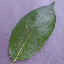

In [127]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG",target_size=(64,64))
img

In [128]:
x=image.img_to_array(img)

In [129]:
x

array([[[165., 153., 189.],
        [165., 153., 189.],
        [163., 151., 187.],
        ...,
        [178., 172., 208.],
        [175., 169., 205.],
        [175., 169., 205.]],

       [[163., 151., 187.],
        [163., 151., 187.],
        [166., 154., 190.],
        ...,
        [174., 168., 204.],
        [175., 169., 205.],
        [172., 166., 202.]],

       [[162., 150., 186.],
        [163., 151., 187.],
        [164., 152., 188.],
        ...,
        [172., 166., 202.],
        [173., 167., 203.],
        [172., 166., 202.]],

       ...,

       [[135., 119., 156.],
        [132., 116., 153.],
        [130., 114., 151.],
        ...,
        [163., 153., 188.],
        [160., 150., 185.],
        [147., 137., 172.]],

       [[134., 118., 155.],
        [131., 115., 152.],
        [132., 116., 153.],
        ...,
        [147., 137., 172.],
        [146., 136., 171.],
        [144., 134., 169.]],

       [[129., 113., 150.],
        [136., 120., 157.],
        [141., 1

In [130]:
x.ndim

3

In [131]:
x.shape

(64, 64, 3)

In [132]:
x=np.expand_dims(x,axis=0)

In [133]:
x

array([[[[165., 153., 189.],
         [165., 153., 189.],
         [163., 151., 187.],
         ...,
         [178., 172., 208.],
         [175., 169., 205.],
         [175., 169., 205.]],

        [[163., 151., 187.],
         [163., 151., 187.],
         [166., 154., 190.],
         ...,
         [174., 168., 204.],
         [175., 169., 205.],
         [172., 166., 202.]],

        [[162., 150., 186.],
         [163., 151., 187.],
         [164., 152., 188.],
         ...,
         [172., 166., 202.],
         [173., 167., 203.],
         [172., 166., 202.]],

        ...,

        [[135., 119., 156.],
         [132., 116., 153.],
         [130., 114., 151.],
         ...,
         [163., 153., 188.],
         [160., 150., 185.],
         [147., 137., 172.]],

        [[134., 118., 155.],
         [131., 115., 152.],
         [132., 116., 153.],
         ...,
         [147., 137., 172.],
         [146., 136., 171.],
         [144., 134., 169.]],

        [[129., 113., 150.],
       

In [134]:
y=np.argmax(model.predict(x),axis=1)

In [135]:
y

array([1])

In [136]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [151]:
index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

In [152]:
index[y[0]]

'Corn_(maize)___healthy'

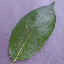

In [153]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.JPG",target_size=(64,64))
img

In [154]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y = np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']

index[y[0]]

'Apple___healthy'

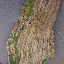

In [164]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/3fb57074-5e53-45e8-9219-bc0cee74f440___RS_NLB  4597.JPG",target_size=(64,64))
img 

In [165]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y= np.argmax(model.predict(x),axis=1)

index=['Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy']
index[y[0]]

'Corn_(maize)___healthy'

# IBM Deployment

In [166]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 23.8 MB/s eta 0:00:01


In [170]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
      "url" :"https://us-south.ml.cloud.ibm.com",
        "apikey":"1kAC0kCO4BFzUDcB6Nsj6a9tqZyPkXeT0925GnGkPQ-e"     
}

In [171]:
client=APIClient(wml_credentials) 

In [172]:
client

In [178]:
def guid_space_name(client,Plant_Disease_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==Plant_Disease_deploy)['metadata']['id']) 

In [179]:
space_uid=guid_space_name(client,'Plant_Disease_deploy')
print(space_uid) 

f359f277-1d6f-4d17-bd6f-02c82b07094e


In [180]:
client.set.default_space(space_uid) 

'SUCCESS'

In [182]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [184]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [185]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [188]:
ls

'Dataset Plant Disease'/                                      fruit.h5
'Fertilizers Recommendation System For Disease Prediction'/


In [190]:
#save the model as zip file
!tar -zcvf Plant_Disease_deploy.tgz fruit.h5

fruit.h5


In [192]:
ls

'Dataset Plant Disease'/
'Fertilizers Recommendation System For Disease Prediction'/
 fruit.h5
 Plant_Disease_deploy.tgz


In [193]:
model_details=client.repository.store_model(model='Plant_Disease_deploy.tgz',
 meta_props={
            client.repository.ModelMetaNames.NAME:"CNN Model Building",
            client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [194]:
model_id=client.repository.get_model_id(model_details) 

In [195]:
 model_id

'07255403-92f0-4ecd-8825-b5bf17623700'

In [196]:
client.repository.download(model_id,'Fertilizer.tar.gb') 

Successfully saved model content to file: 'Fertilizer.tar.gb'


'/home/wsuser/work/Fertilizer.tar.gb'

In [197]:
ls

'Dataset Plant Disease'/
'Fertilizers Recommendation System For Disease Prediction'/
 Fertilizer.tar.gb
 fruit.h5
 Plant_Disease_deploy.tgz
